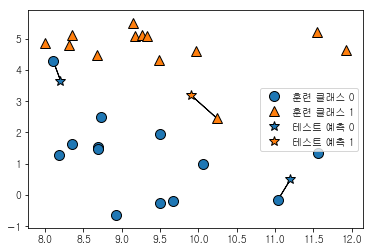

In [21]:
import mglearn
from matplotlib.pyplot import rc
rc('font',family='New Gulim')
mglearn.plots.plot_knn_classification(n_neighbors=1)

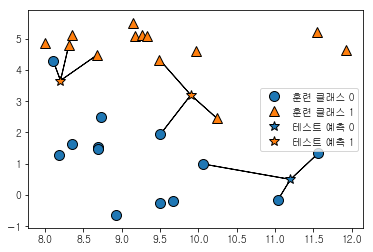

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [23]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.fit(X_train,y_train)
print(clf.predict(X_test))
print("{:.2f}".format(clf.score(X_test, y_test)))
print(y_test)

[1 0 1 0 1 0 0]
0.86
[1 0 1 0 1 1 0]


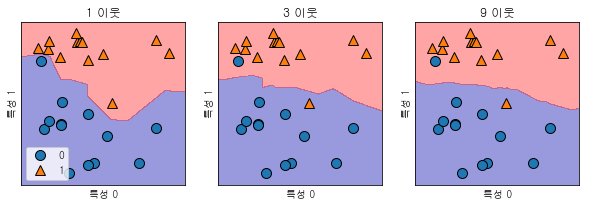

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

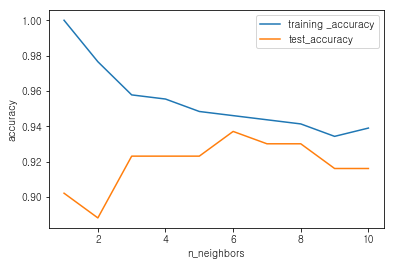

In [27]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=66)
training_accuracy=[]
test_accuracy=[]

neighbors_setting=range(1,11)

for n_neighbors in neighbors_setting:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_setting, training_accuracy, label="training _accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test_accuracy" )
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [33]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)
reg=KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("test set prediction : {}".format(reg.predict(X_test)))

test set prediction : [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [29]:
print("test set R^2 :{:.2f}".format(reg.score(X_test, y_test)))

test set R^2 :0.83


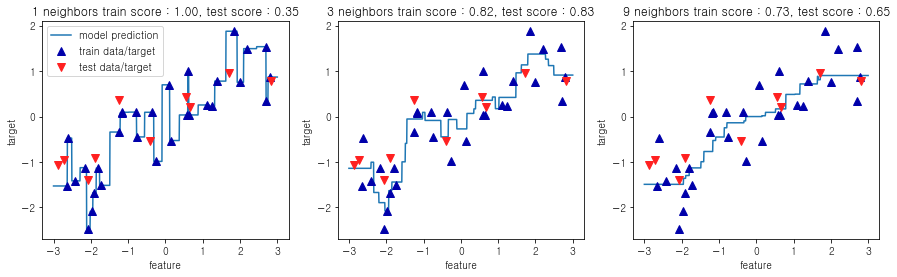

In [30]:
import numpy as np
fig, axes =plt.subplots(1,3, figsize=(15,4))
line= np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbors train score : {:.2f}, test score : {:.2f}".format(n_neighbors, reg.score(X_train,y_train),
                                                                                reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model prediction","train data/target", "test data/target"], loc="best")